
### HAMOYE PROJECT 2: Appliance Energy Prediction with LinearRegression


### importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn import preprocessing, model_selection, metrics
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

### Reading the data

In [2]:
data = pd.read_csv("energydata_complete.csv")

In [3]:
#checking out the shape of the dataset
data.shape

(19735, 29)

In [4]:
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [5]:
#data.info()

### Exploring Dataset

In [6]:
data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [7]:
#Number of null values in all columns
#data.isnull().sum().sort_values(ascending = True)

#### As shown above , there are no missing values in the dataset 

In [8]:
# Check the distribution of values in lights column
data.lights.value_counts()

0     15252
10     2212
20     1624
30      559
40       77
50        9
60        1
70        1
Name: lights, dtype: int64

## Dropping off some features
#### Due to lot of zero enteries light column is not of much use and will be dropped
#### we will drop Date column since this is not a timeseries problem


In [9]:
new_data = data.drop(['lights','date'], axis=1)

In [10]:
new_data.columns

Index(['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [11]:
new_data.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


### Correlation Plots

In [59]:
import seaborn as sns
corr = new_data.corr()
print(corr)

             Appliances        T1      RH_1        T2      RH_2        T3  \
Appliances     1.000000  0.055447  0.086031  0.120073 -0.060465  0.085060   
T1             0.055447  1.000000  0.164006  0.836834 -0.002509  0.892402   
RH_1           0.086031  0.164006  1.000000  0.269839  0.797535  0.253230   
T2             0.120073  0.836834  0.269839  1.000000 -0.165610  0.735245   
RH_2          -0.060465 -0.002509  0.797535 -0.165610  1.000000  0.137319   
T3             0.085060  0.892402  0.253230  0.735245  0.137319  1.000000   
RH_3           0.036292 -0.028550  0.844677  0.121497  0.678326 -0.011234   
T4             0.040281  0.877001  0.106180  0.762066 -0.047304  0.852778   
RH_4           0.016965  0.097861  0.880359  0.231563  0.721435  0.122737   
T5             0.019760  0.885247  0.205797  0.720550  0.110409  0.888169   
RH_5           0.006955 -0.014782  0.303258  0.029595  0.250271 -0.066355   
T6             0.117638  0.654769  0.316141  0.801186 -0.009670  0.686882   

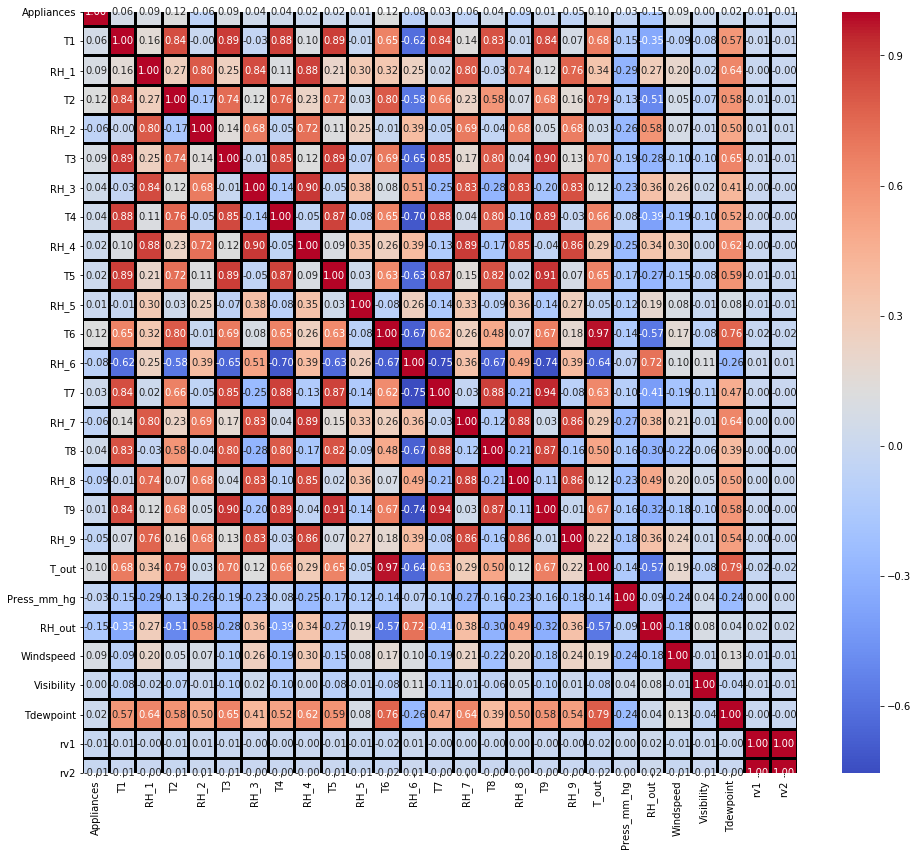

In [20]:
f, ax = plt.subplots(figsize=(16, 14))
sns.heatmap(corr,annot=True, fmt='.2f',cmap='coolwarm',linewidths=2, linecolor='black')
plt.show()

In [21]:
target_corr = data.corr()["Appliances"].sort_values(ascending=True)
print(target_corr)

RH_out        -0.152282
RH_8          -0.094039
RH_6          -0.083178
RH_2          -0.060465
RH_7          -0.055642
RH_9          -0.051462
Press_mm_hg   -0.034885
rv1           -0.011145
rv2           -0.011145
Visibility     0.000230
RH_5           0.006955
T9             0.010010
Tdewpoint      0.015353
RH_4           0.016965
T5             0.019760
T7             0.025801
RH_3           0.036292
T8             0.039572
T4             0.040281
T1             0.055447
T3             0.085060
RH_1           0.086031
Windspeed      0.087122
T_out          0.099155
T6             0.117638
T2             0.120073
lights         0.197278
Appliances     1.000000
Name: Appliances, dtype: float64


# Data Pre Processing

### Normalizing the dataset with MinMax() scaler

In [23]:
from sklearn.preprocessing import MinMaxScaler
normalizer = MinMaxScaler()
new_data_n = normalizer.fit_transform(new_data)

#putting the dataset back in a dataframe
new_data_n = pd.DataFrame(new_data_n,columns=new_data.columns)

In [24]:
new_data_n.shape

(19735, 27)

#### Simple Linear Regression
T2 against T6

In [25]:
independent_col = new_data_n[["T2"]]
target_col = new_data_n[["T6"]]

### splitting dataset into train and test set to avoid overftting
##### we use 70 percent of the data to train the model and use 30 percent to test the model learning outcome

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(independent_col,target_col, test_size=0.3,random_state=42)

In [27]:
print("Training data is", X_train.shape)
print("Training target is", y_train.shape)
print("test data is", X_test.shape)
print("test target is", y_test.shape)

Training data is (13814, 1)
Training target is (13814, 1)
test data is (5921, 1)
test target is (5921, 1)


In [28]:
X_train.head()

,T2
9129,0.122850
2453,0.188999
9152,0.057427
12694,0.280834
16952,1.000000


In [29]:
y_train.head()

,T6
9129,0.180420
2453,0.275215
9152,0.131907
12694,0.444040
16952,0.944695


### model fit and predict

In [30]:
# fitting the simple linaer regression
simple_model = LinearRegression()
simple_model_fit = simple_model.fit(X_train, y_train)

In [31]:
# simple linear prediction
simple_model_pred = simple_model.predict(X_test)

### The coefficients

In [32]:
print ('Coefficients: ', simple_model.coef_)
print ('Intercept: ',simple_model.intercept_)

# Explained variance score: 1 is perfect prediction
#print('Variance score: %.2f' % simple_model.score(simple_train_X, y_train))

Coefficients:  [[0.8910771]]
Intercept:  [0.13176428]


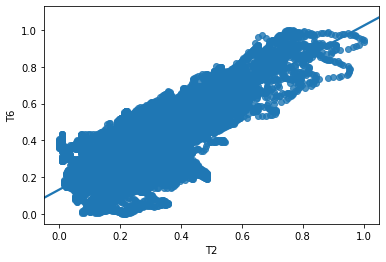

In [33]:
sns.regplot(x="T2", y="T6", 
             data=new_data_n) 

## Metrics

#### RMSE

In [34]:
from sklearn.metrics import mean_squared_error
print('RMSE is : \n', sqrt(mean_squared_error(y_test, simple_model_pred)))

RMSE is : 
 0.10567064851347532


### MAE

In [35]:
from sklearn.metrics import mean_absolute_error,r2_score
mae = mean_absolute_error(y_test, simple_model_pred)
round(mae, 3)

0.082

### r2 score

In [36]:
r2_score = r2_score(y_test, simple_model_pred)
round(r2_score, 2)

0.64

### rss

In [37]:
rss = np.sum(np.square(y_test - simple_model_pred))
round(rss, 2)

T6    66.12
dtype: float64

### Residual MSE

In [38]:
print("Residual sum of squares (MSE): %.2f" % np.mean((simple_model_pred - y_test) ** 2))

Residual sum of squares (MSE): 0.01


### Training a lasso regression 

In [39]:
from sklearn.linear_model import Lasso, Ridge
lasso_model = Lasso(alpha=0.001)
lasso_model_fit = lasso_model.fit(X_train, y_train)
lasso_model_pred = lasso_model.predict(X_test)

In [40]:
print('RMSE is : \n', sqrt(mean_squared_error(y_test, lasso_model_pred)))

RMSE is : 
 0.10585233765426633


In [41]:
print ('Coefficients: ', lasso_model.coef_)
print ('Intercept: ', lasso_model.intercept_)

Coefficients:  [0.85177991]
Intercept:  [0.14387771]


### Training a Ridge regression 

In [42]:
ridge_model = Ridge(alpha=0.4)
ridge_model_fit = ridge_model.fit(X_train, y_train)
ridge_model_pred = ridge_model.predict(X_test)

In [43]:
print('RMSE is : \n', sqrt(mean_squared_error(y_test, ridge_model_pred)))

RMSE is : 
 0.10567068865045522


In [44]:
print ('Coefficients: ', ridge_model.coef_)
print ('Intercept: ', ridge_model.intercept_)

Coefficients:  [[0.8900643]]
Intercept:  [0.13207648]


## Multiple Linear Regression

In [45]:
# extracting the target column from the independents columns
target_col2 = new_data_n["Appliances"]
independent_col2 = new_data_n.drop(["Appliances"], axis=1)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(independent_col2,target_col2, test_size=0.3,random_state=42)

In [47]:
print("Training data is", X_train.shape)
print("Training target is", y_train.shape)
print("test data is", X_test.shape)
print("test target is", y_test.shape)

Training data is (13814, 26)
Training target is (13814,)
test data is (5921, 26)
test target is (5921,)


In [48]:
X_train.head()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
9129,0.497360,0.236767,0.122850,0.565939,0.373878,0.303474,0.476577,0.264760,0.408027,0.159533,...,0.475893,0.376380,0.168810,0.862791,0.776316,0.142857,0.984615,0.192308,0.724554,0.724554
2453,0.286167,0.482616,0.188999,0.669978,0.217957,0.735317,0.270270,0.691421,0.178691,0.333576,...,0.240375,0.703504,0.262594,0.836434,0.807018,0.142857,0.600000,0.342383,0.864041,0.864041
9152,0.422386,0.230529,0.057427,0.606430,0.373878,0.338059,0.414414,0.236449,0.378404,0.151639,...,0.468262,0.409803,0.110397,0.853488,0.859649,0.095238,0.917949,0.158371,0.499502,0.499502
12694,0.560718,0.446840,0.280834,0.704002,0.514290,0.515189,0.540541,0.486556,0.509317,0.424604,...,0.561915,0.340784,0.444802,0.559690,0.750000,0.119048,0.384615,0.558069,0.323173,0.323173
16952,0.835269,0.422071,1.000000,0.318493,0.745383,0.459106,0.900901,0.516432,0.748845,0.455819,...,0.854318,0.633278,0.849946,0.530233,0.355263,0.142857,0.600000,0.787330,0.341060,0.341060


In [49]:
y_train.head()

9129     0.037383
2453     0.018692
9152     0.028037
12694    0.102804
16952    0.037383
Name: Appliances, dtype: float64

In [50]:
# fitting the simple linaer regression
mlr_model = LinearRegression()
mlr_model_fit = mlr_model.fit(X_train, y_train)

In [51]:
# multiple linear regression prediction
mlr_model_pred = mlr_model.predict(X_test)

In [52]:
compare_prediction2 = pd.DataFrame({'y_test': y_test, 'mlr_model_pred': mlr_model_pred})
print(compare_prediction2)

         y_test  mlr_model_pred
8980   0.028037        0.033222
2754   0.074766        0.244116
9132   0.037383        0.034000
14359  0.037383        0.105377
8875   0.056075        0.023360
...         ...             ...
831    0.224299        0.086607
10993  0.046729        0.075163
11761  0.037383        0.068447
12364  0.093458        0.100323
11863  0.037383        0.057222

[5921 rows x 2 columns]


In [53]:
print ('Coefficients: ', mlr_model.coef_)
print ('Intercept: ',mlr_model.intercept_)

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % mlr_model.score(X_train, y_train))

Coefficients:  [-0.00328105  0.5535466  -0.23617792 -0.45669795  0.29062714  0.09604827
  0.028981    0.02638578 -0.01565684  0.01600579  0.23642491  0.03804865
  0.01031878 -0.04461364  0.10199505 -0.15759548 -0.18994077 -0.03980032
 -0.32185967  0.00683933 -0.07767065  0.02918313  0.01230661  0.11775773
  0.0007701   0.0007701 ]
Intercept:  0.15290295882252924
Variance score: 0.14


### Metrics

#### RMSE

In [54]:
print('RMSE is : \n', sqrt(mean_squared_error(y_test, mlr_model_pred)))

RMSE is : 
 0.08751444947661711


#### MAE

In [55]:
from sklearn.metrics import mean_absolute_error,r2_score
mae = mean_absolute_error(y_test, mlr_model_pred)
round(mae, 3)

0.05

#### r2 score

In [56]:
r2_score = r2_score(y_test, mlr_model_pred)
round(r2_score, 2)

0.15

#### Residual Sum of Squares

In [57]:
rss = np.sum(np.square(y_test - mlr_model_pred))
round(rss, 3)

45.348

#### Residual MSE

In [58]:
print("Residual sum of squares (MSE): %.2f" % np.mean((mlr_model_pred - y_test) ** 2))

Residual sum of squares (MSE): 0.01
